# DNN for AED with Keras/TensorFlow

Date: November 11, 2018 and February 27, 2019

Neural network: input MFCC to DNN

## Preparing data set for CNN

In [117]:
DATASET_FOLDER = '../dataset/data_measurement'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(flatten=True)
shape = ds.shape
class_labels = ds.class_labels

((420, 1152), (180, 1152))

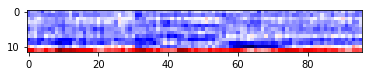

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)), cmap='seismic')
train_data.shape, test_data.shape

### DNN model

In [120]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Dense(64, input_dim=shape[0]*shape[1], activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 64)                73792     
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 6)                 390       
Total params: 74,182
Trainable params: 74,182
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

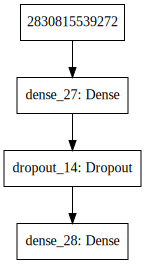

In [122]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training DNN

In [123]:
EPOCHS = 100
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 420 samples, validate on 180 samples
Epoch 1/100
420/420 [==============================] - 1s 3ms/step - loss: 1.5338 - acc: 0.5905 - val_loss: 0.3735 - val_acc: 0.8611
Epoch 2/100
420/420 [==============================] - 0s 126us/step - loss: 0.5806 - acc: 0.7810 - val_loss: 0.4326 - val_acc: 0.8389
Epoch 3/100
420/420 [==============================] - 0s 123us/step - loss: 0.4114 - acc: 0.8452 - val_loss: 0.1475 - val_acc: 0.9444
Epoch 4/100
420/420 [==============================] - 0s 133us/step - loss: 0.3084 - acc: 0.8786 - val_loss: 0.2963 - val_acc: 0.9056
Epoch 5/100
420/420 [==============================] - 0s 133us/step - loss: 0.2766 - acc: 0.9024 - val_loss: 0.3085 - val_acc: 0.8833
Epoch 6/100
420/420 [==============================] - 0s 133us/step - loss: 0.2029 - acc: 0.9190 - val_loss: 0.1583 - val_acc: 0.9278
Epoch 7/100
420/420 [==============================] - 0s 133us/step - loss: 0.2157 - acc: 0.9238 - val_loss: 0.2825 - val_acc: 0.9000
Epoch 8/100

420/420 [==============================] - 0s 191us/step - loss: 0.0277 - acc: 0.9857 - val_loss: 0.1182 - val_acc: 0.9778
Epoch 62/100
420/420 [==============================] - 0s 158us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.1154 - val_acc: 0.9833
Epoch 63/100
420/420 [==============================] - 0s 153us/step - loss: 0.0159 - acc: 0.9929 - val_loss: 0.1630 - val_acc: 0.9778
Epoch 64/100
420/420 [==============================] - 0s 143us/step - loss: 0.0231 - acc: 0.9929 - val_loss: 0.1271 - val_acc: 0.9833
Epoch 65/100
420/420 [==============================] - 0s 134us/step - loss: 0.0119 - acc: 0.9952 - val_loss: 0.1645 - val_acc: 0.9722
Epoch 66/100
420/420 [==============================] - 0s 130us/step - loss: 0.0109 - acc: 0.9976 - val_loss: 0.1298 - val_acc: 0.9833
Epoch 67/100
420/420 [==============================] - 0s 134us/step - loss: 0.0122 - acc: 0.9929 - val_loss: 0.1266 - val_acc: 0.9722
Epoch 68/100
420/420 [==============================] - 0s 11

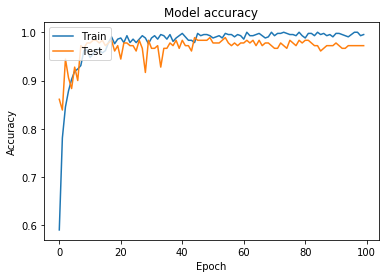

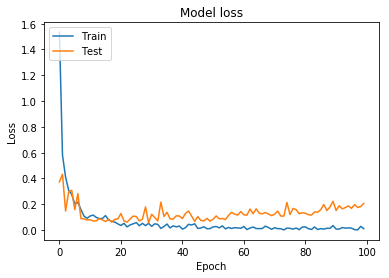

In [124]:
%run history.py
%matplotlib inline

plot_accuracy(history)
plot_loss(history)

## Save the model

In [125]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/dnn_for_aed_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [126]:
del model
model = models.load_model(filename)

## Confirmation

In [127]:
import numpy as np
import matplotlib.pyplot as plt

In [128]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [129]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [130]:
class_labels

['train_tokyu_1',
 'yokohama_station_tokyu',
 'mcdonalds',
 'landmark_tower_mall',
 'yokohama_port',
 'street']

In [131]:
(activations[-1][:10]*100).astype(int)

array([[ 99,   0,   0,   0,   0,   0],
       [  0,   0, 100,   0,   0,   0],
       [  0,   0, 100,   0,   0,   0],
       [  0,   0,   0,   0,   0,  99],
       [  0,   0, 100,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100],
       [  0, 100,   0,   0,   0,   0],
       [  0,   0,   0,   0,  99,   0],
       [  0,   0, 100,   0,   0,   0],
       [  0, 100,   0,   0,   0,   0]])

In [132]:
test_labels[:10].astype(int)

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])